In [1]:
#Importing libraries necessary for analysis
import csv
from bs4 import BeautifulSoup
import requests
import pandas as pd
import time
time.sleep(2)
import warnings
warnings.filterwarnings('ignore')

In [2]:
urls = []

url1 = 'https://www.imdb.com/title/tt0482571/reviews/?ref_=tt_ql_urv'
url2 = 'https://www.imdb.com/title/tt0058548/reviews/?ref_=tt_ql_urv'
url3 = 'https://www.imdb.com/title/tt13560574/reviews/?ref_=tt_ql_urv'
url4 = 'https://www.imdb.com/title/tt0376127/reviews/?ref_=tt_ql_urv'
url5 = 'https://www.imdb.com/title/tt0046268/reviews/?ref_=tt_ql_urv'
url6 = 'https://www.imdb.com/title/tt7322224/reviews/?ref_=tt_ql_urv'
url7 = 'https://www.imdb.com/title/tt1230165/reviews/?ref_=tt_ql_urv'

In [3]:
urls.append(url1)
urls.append(url2)
urls.append(url3)
urls.append(url4)
urls.append(url5)
urls.append(url6)
urls.append(url7)

In [4]:
#Code to scrape data from IMDB Website
content = []
for url in urls:
    page = requests.get(url, timeout=2.50)
    page_content = page.content
    soup = BeautifulSoup(page_content, 'html.parser')
    content.append(soup.find_all('div', class_= 'review-container'))

In [5]:
print(content) #Prints result of all data scraped with HTML tags

[[<div class="review-container">
<div class="lister-item-content">
<div class="ipl-ratings-bar">
<span class="rating-other-user-rating">
<svg class="ipl-icon ipl-star-icon" fill="#000000" height="24" viewbox="0 0 24 24" width="24" xmlns="http://www.w3.org/2000/svg">
<path d="M0 0h24v24H0z" fill="none"></path>
<path d="M12 17.27L18.18 21l-1.64-7.03L22 9.24l-7.19-.61L12 2 9.19 8.63 2 9.24l5.46 4.73L5.82 21z"></path>
<path d="M0 0h24v24H0z" fill="none"></path>
</svg>
<span>10</span><span class="point-scale">/10</span>
</span>
</div>
<a class="title" href="/review/rw1953427/"> Just As Intriguing The Second Time, Too!
</a> <div class="display-name-date">
<span class="display-name-link"><a href="/user/ur4445210/">ccthemovieman-1</a></span><span class="review-date">29 September 2008</span>
</div>
<div class="content">
<div class="text show-more__control">I've seen this film twice now - about a year ago and then yesterday - and thoroughly enjoyed it both times, even the second time when I reme

In [6]:
#To create a dataset of all Reviews and Ratings of movies that were scraped
movie = pd.DataFrame(columns=['Review','Rating'])

In [7]:
review = []
rating = []
count = 0
for cc in content:
    for c in cc:    
        count+= 1   
    
        print('\nMovie review ', count)
        #Get review.
        str = c.find_all('a', attrs={'class':'title'})      
        rReview =''
        for s in str:
            #print('Review is: ',s.get_text())
            rReview = s.get_text()
      
        #Get rating.
        ratings = c.find_all('span', attrs={'class':''})
        rVal = []
        for r in ratings:
            str1 = r.get_text().strip()
            rVal.append(str1)
    
        val = rVal[0]
        if(len(val) > 2):
            continue     
        else:
            review.append(rReview)
            rating.append(val)
            print('Review: ', rReview)
            print('Rating: ',val) 
        
movie['Review'] = review
movie['Rating'] = rating


Movie review  1
Review:   Just As Intriguing The Second Time, Too!

Rating:  10

Movie review  2
Review:   Fantastic.

Rating:  10

Movie review  3
Review:   Are you watching closely?

Rating:  10

Movie review  4
Review:   A Nutshell Review: The Prestige

Rating:  10

Movie review  5
Review:   Give This Film Time to Sink In...

Rating:  10

Movie review  6
Review:   Outstanding acting performances worth price of admission

Rating:  9

Movie review  7
Review:   So glad this movie did not stay an illusion...

Rating:  8

Movie review  8
Review:   A Film with Intellect

Rating:  10

Movie review  9
Review:   Obsession and Revenge

Rating:  9

Movie review  10
Review:   Webby meshwork of magic and mystery

Rating:  9

Movie review  11
Review:   Storytelling at its best!

Rating:  8

Movie review  12
Review:   The Prestige

Rating:  9

Movie review  13
Review:   A Stylish, Uniquely Twisted Period Piece

Rating:  8

Movie review  14
Review:   Batman and Alfred (outside Gotham) meet Wolveri

Review:   Rock On!!...bring it on!

Rating:  9

Movie review  163

Movie review  164
Review:   Rock with some Blue

Rating:  7

Movie review  165
Review:   a real neat movie rockin all the way

Rating:  10

Movie review  166
Review:   Could usher in the start of a new bollywood genre....Excellent and Enjoyable!!!!

Rating:  8

Movie review  167
Review:   Not as rocking as expected

Rating:  5

Movie review  168
Review:   The Next Step by the Young Brigade

Rating:  8

Movie review  169

Movie review  170
Review:   Completely Rocking!

Rating:  8

Movie review  171
Review:   REFRESHINGLY GOOD.

Rating:  9

Movie review  172
Review:   Doesn't Disappoint!!!

Rating:  7

Movie review  173
Review:   Makes you feel young again!

Rating:  8

Movie review  174
Review:   A new and high point in Bollywood film-making...

Rating:  8

Movie review  175
Review:   Rock for the ages...

Rating:  8


In [8]:
movie.head()

,Review,Rating
0,"Just As Intriguing The Second Time, Too!\n",10
1,Fantastic.\n,10
2,Are you watching closely?\n,10
3,A Nutshell Review: The Prestige\n,10
4,Give This Film Time to Sink In...\n,10


In [9]:
movie.shape

(161, 2)

In [10]:
#Generating Personalized Dataset
movie.to_csv('movieReviews.csv', index=False)

In [11]:
#Importing LIBRARIES for text pre-processing
import string
import re
#import nltk
#nltk.download()
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.model_selection import train_test_split

In [12]:
textFeatures = movie['Review'].copy()
textFeatures.shape

(161,)

In [13]:
#Preparing text for Wordcloud
text = []
for t in textFeatures:
  text.append(t)
all_text = ', '.join(t for t in text)
#print(all_text)
print(len(all_text))

6381


In [14]:
from os import path
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

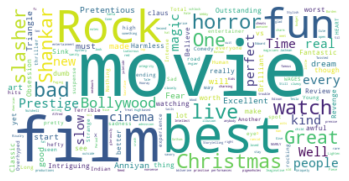

In [15]:
# Create stopword list
stopwords = set(STOPWORDS)
stopwords.update(["br", "im", "thats"]) #"im","lol","Xa","film"])

# Generate a word cloud image
wordcloud = WordCloud(stopwords=stopwords, background_color="white").generate(all_text)

# Display the image
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()
#save the generated image to a file
#wordcloud.to_file("wordcloud_cb_all.png")

### Sentiment Analysis Using Vader

In [16]:
import nltk
nltk.download('vader_lexicon')
from nltk.sentiment.vader import SentimentIntensityAnalyzer

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\w\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [17]:
sid = SentimentIntensityAnalyzer()
c = 0
for t in text:
    c+=1
    print(c, t)
    ss = sid.polarity_scores(t)
    print(ss)
    
    if(ss['compound'] >= 0.05):
        print('positive')
 
    elif(ss['compound'] <= -0.05):
        print('negative')
    else:
        print('neutral')
    print('\n')

1  Just As Intriguing The Second Time, Too!

{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
neutral


2  Fantastic.

{'neg': 0.0, 'neu': 0.0, 'pos': 1.0, 'compound': 0.5574}
positive


3  Are you watching closely?

{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
neutral


4  A Nutshell Review: The Prestige

{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
neutral


5  Give This Film Time to Sink In...

{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
neutral


6  Outstanding acting performances worth price of admission

{'neg': 0.0, 'neu': 0.459, 'pos': 0.541, 'compound': 0.7096}
positive


7  So glad this movie did not stay an illusion...

{'neg': 0.0, 'neu': 0.708, 'pos': 0.292, 'compound': 0.5095}
positive


8  A Film with Intellect

{'neg': 0.0, 'neu': 0.4, 'pos': 0.6, 'compound': 0.4588}
positive


9  Obsession and Revenge

{'neg': 0.853, 'neu': 0.147, 'pos': 0.0, 'compound': -0.7003}
negative


10  Webby meshwork of magic and mystery

{'neg': 0.0, 'neu': 1.

## Prepare 'Truth Set'

I will be using 'User Rating' as a truth set to evaluate the results. To prepare 'Truth Set', I'll define three
classes - 'positive', 'negative', and 'netural'. On the scale of 0 to 10, consider review being 'positvie' if the
rating is from 6 to 10, 'negative' if the rating is from 0 to 4, 'netural' if rating is 5. I'll add this information in a
new column called 'class-label'.

In [18]:
label = []
for r in movie['Rating']:
    r = int(r)
    if (r>5):
        label.append('1') #Positive
    elif(r<5):
        label.append('-1') #Negative
    elif(r==5):
        label.append('0') #Netural
movie['class-label'] = label

In [19]:
movie['class-label'].value_counts()

1     117
-1     34
0      10
Name: class-label, dtype: int64

In [20]:
#To remove all Neutral Sentiments.
movie = movie[movie['class-label']!='0']

In [21]:
movie['class-label'].value_counts()

1     117
-1     34
Name: class-label, dtype: int64

In [22]:
textFeatures = movie['Review'].copy()
textFeatures.shape

(151,)

In [23]:
import nltk
nltk.download('punkt')
# Stemming using TextBlob library for stemming
from textblob import TextBlob 

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\w\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [24]:
def textblob_tokenizer(input_str):
    blob = TextBlob(input_str.lower())
    tokens = blob.words
    words = [token.stem() for token in tokens]
    return words

In [25]:
#countvectorizer convers each review into a vector based on the word count.
countvectorizer = CountVectorizer(analyzer= 'word', stop_words= 'english', 
                                  tokenizer=textblob_tokenizer) 

#convers text into a vector based on tf-idf weighting scheme. 
tfidfvectorizer = TfidfVectorizer(analyzer= 'word', stop_words= 'english', 
                                  tokenizer=textblob_tokenizer) 

In [26]:
textFeatures

0             Just As Intriguing The Second Time, Too!\n
1                                           Fantastic.\n
2                            Are you watching closely?\n
3                      A Nutshell Review: The Prestige\n
4                    Give This Film Time to Sink In...\n
                             ...                        
156                                 REFRESHINGLY GOOD.\n
157                              Doesn't Disappoint!!!\n
158                        Makes you feel young again!\n
159     A new and high point in Bollywood film-making...
160                               Rock for the ages...\n
Name: Review, Length: 151, dtype: object

In [27]:
count_matrix = countvectorizer.fit_transform(textFeatures) 
tfidf_matrix = tfidfvectorizer.fit_transform(textFeatures)

In [28]:
print(tfidf_matrix) #print elements of the matrix.

  (0, 336)	0.46741772707796
  (0, 292)	0.5372793465733358
  (0, 182)	0.4964129189288909
  (0, 184)	0.4964129189288909
  (1, 124)	1.0
  (2, 70)	0.803863796574393
  (2, 362)	0.5948134132288906
  (3, 254)	0.5384460119082867
  (3, 271)	0.5718472812915624
  (3, 234)	0.618923726431222
  (4, 298)	0.5876169541429189
  (4, 129)	0.4126732797087262
  (4, 330)	0.42222290215917185
  (4, 336)	0.5532945872774542
  (5, 13)	0.41858508527511057
  (5, 257)	0.41858508527511057
  (5, 371)	0.3867467553457388
  (5, 247)	0.41858508527511057
  (5, 11)	0.41858508527511057
  (5, 240)	0.3867467553457388
  (6, 172)	0.4659095961559456
  (6, 308)	0.4659095961559456
  (6, 90)	0.43047167932256397
  (6, 216)	0.26039785386022724
  (6, 139)	0.4659095961559456
  :	:
  (143, 46)	0.3435591497569352
  (143, 113)	0.360925557152778
  (143, 108)	0.38331475030334816
  (143, 228)	0.360925557152778
  (143, 307)	0.360925557152778
  (144, 52)	0.5919687046031599
  (144, 374)	0.5469425066137332
  (144, 309)	0.5919687046031599
  (145, 

In [29]:
print(tfidf_matrix.shape) 
print(count_matrix.shape)

(151, 376)
(151, 376)


#### Above numbers show dimension of count_matrix, there are X rows (150 reviews), and Y columns (385 word-features) in the transformed dataset. 

## BUILDING ML MODELS

In [30]:
features_train, features_test, labels_train, labels_test = train_test_split(
    tfidf_matrix, movie['class-label'], test_size=0.3,random_state=8)
print(features_train.shape, features_test.shape, labels_train.shape, labels_test.shape)

(105, 376) (46, 376) (105,) (46,)


In [31]:
print(labels_test)

4       1
31      1
29     -1
151     1
71      1
36      1
23     -1
156     1
141     1
80      1
60     -1
32      1
113     1
54      1
128    -1
157     1
147     1
136    -1
76      1
138    -1
56     -1
1       1
73      1
96      1
104     1
0       1
129    -1
3       1
17      1
124    -1
46      1
12      1
22      1
133    -1
97      1
82      1
143     1
95      1
35      1
103     1
75      1
43      1
84      1
63      1
160     1
53      1
Name: class-label, dtype: object


### User reviews returned 10 negative and 35 positive reviews from the test set

In [33]:
#Importing Libraries for Standardization
from sklearn.metrics import classification_report, confusion_matrix  
from sklearn.metrics import accuracy_score

In [34]:
#SVM classifier
from sklearn.svm import SVC
print("\nEvaluation for SVM \n")
svc = SVC(kernel='sigmoid', gamma=1.0)
svc.fit(features_train, labels_train)
prediction = svc.predict(features_test)
acc = accuracy_score(labels_test,prediction)
print('Accuracy:', acc)
from sklearn.metrics import precision_score
prec = precision_score(labels_test,prediction, average='weighted')
print('Precision:', prec)
from sklearn.metrics import recall_score
recall = recall_score(labels_test,prediction, average='weighted')
print('Recall:', recall)
from sklearn.metrics import f1_score
f1 = f1_score(labels_test,prediction, average='weighted')
print('F-1 measure: ', f1)
print('\nConfusion Matrix:\n')
print(confusion_matrix(labels_test, prediction))  
print(classification_report(labels_test, prediction))
#print(prediction)


Evaluation for SVM 

Accuracy: 0.782608695652174
Precision: 0.6124763705103969
Recall: 0.782608695652174
F-1 measure:  0.687168610816543

Confusion Matrix:

[[ 0 10]
 [ 0 36]]
              precision    recall  f1-score   support

          -1       0.00      0.00      0.00        10
           1       0.78      1.00      0.88        36

    accuracy                           0.78        46
   macro avg       0.39      0.50      0.44        46
weighted avg       0.61      0.78      0.69        46



In [35]:
#Decision Tree
print("\nEvaluation for Decision Tree \n")
from sklearn.tree import DecisionTreeClassifier
dtree = DecisionTreeClassifier()
dtree.fit(features_train, labels_train)
prediction = dtree.predict(features_test)
acc = accuracy_score(labels_test,prediction)
print('Accuracy: ', acc)
prec = precision_score(labels_test,prediction, average='weighted')
print('Precision: ', prec)
recall = recall_score(labels_test,prediction, average='weighted')
print('Recall: ', recall)
f1 = f1_score(labels_test,prediction, average='weighted')
print('F-1 measure: ',f1)
print('\nConfusion Matrix:\n')
print(confusion_matrix(labels_test, prediction))  
print(classification_report(labels_test, prediction))


Evaluation for Decision Tree 

Accuracy:  0.782608695652174
Precision:  0.7543478260869566
Recall:  0.782608695652174
F-1 measure:  0.7611556064073225

Confusion Matrix:

[[ 3  7]
 [ 3 33]]
              precision    recall  f1-score   support

          -1       0.50      0.30      0.37        10
           1       0.82      0.92      0.87        36

    accuracy                           0.78        46
   macro avg       0.66      0.61      0.62        46
weighted avg       0.75      0.78      0.76        46



#### POSITIVE WORDLOUD

In [37]:
positive = movie[movie['class-label']!='-1']

In [38]:
positive['class-label'].value_counts()

1    117
Name: class-label, dtype: int64

In [39]:
textFeatures = positive['Review'].copy()
textFeatures.shape

(117,)

In [40]:
#Preparing text for Wordcloud
text = []
for t in textFeatures:
 text.append(t)
all_text = ', '.join(t for t in text)
#print(all_text)
print(len(all_text))

4833


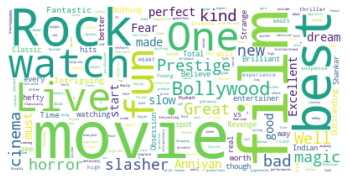

In [41]:
# Create stopword list
stopwords = set(STOPWORDS)
stopwords.update(["br", "im", "thats"]) #"im","lol","Xa","film"])
# Generate a word cloud image
wordcloud = WordCloud(stopwords=stopwords, background_color="white").generate(all_text)
# Display the image
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()
#save the generated image to a file
wordcloud.to_file("positivewordcloud.png")

#### NEGATIVE WORDCLOUD

In [42]:
negative = movie[movie['class-label']!='1']

In [43]:
negative['class-label'].value_counts()

-1    34
Name: class-label, dtype: int64

In [44]:
textFeatures = negative['Review'].copy()
textFeatures.shape

(34,)

In [45]:
#Preparing text for Wordcloud
text = []
for t in textFeatures:
 text.append(t)
all_text = ', '.join(t for t in text)
#print(all_text)
print(len(all_text))

1208


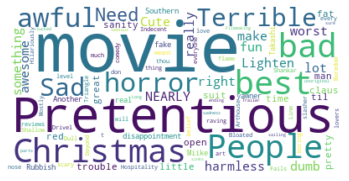

In [47]:
# Create stopword list
stopwords = set(STOPWORDS)
stopwords.update(["br", "im", "thats"]) #"im","lol","Xa","film"])
# Generate a word cloud image
wordcloud = WordCloud(stopwords=stopwords, background_color="white").generate(all_text)
# Display the image
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()
#save the generated image to a file
wordcloud.to_file("negativewordcloud.png")

# Reflection on the two wordclouds
For the Negative wordcloud, It is quite accurate as negative words can clearly be seen on it. However, there are few misleading words such as 'fun','best' and 'pretty' which are not exactly negative but can be seen on the wordcloud. On the otherhad, the wordcloud for positive seems to portray the positive reviews quite well with the excpetion of the word 'bad' which is seen on it and would be more suitable to the wordcloud for negative reviews.

# REFERENCES
[1] Calderon, P. (2018) Vader sentiment analysis explained, Medium. Medium. Available at: https://medium.com/@piocalderon/vader-sentiment-analysis-explained-f1c4f9101cd9 (Accessed: March 4, 2023). 